<a href="https://colab.research.google.com/github/nafilahhans/DataMining/blob/main/Repo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree: Prediksi Aktivitas Berdasarkan Cuaca


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

print("=== EKSPERIMEN DECISION TREE ===")
print("Memulai eksperimen...")

=== EKSPERIMEN DECISION TREE ===
Memulai eksperimen...


In [8]:
print("\n=== DATASET ===")

data = {
    'Suhu': ['Panas', 'Panas', 'Sejuk', 'Dingin', 'Dingin', 'Sejuk', 'Sejuk',
             'Panas', 'Sejuk', 'Dingin', 'Panas', 'Sejuk', 'Dingin', 'Sejuk'],
    'Kelembapan': ['Tinggi', 'Tinggi', 'Tinggi', 'Normal', 'Normal', 'Tinggi',
                   'Normal', 'Tinggi', 'Normal', 'Normal', 'Normal', 'Tinggi', 'Normal', 'Normal'],
    'Berangin': ['Tidak', 'Ya', 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Tidak',
                 'Tidak', 'Tidak', 'Ya', 'Tidak', 'Ya', 'Tidak', 'Tidak'],
    'Aktivitas': ['Tidak', 'Tidak', 'Tidak', 'Bermain', 'Tidak', 'Bermain',
                  'Bermain', 'Tidak', 'Bermain', 'Tidak', 'Bermain', 'Tidak', 'Bermain', 'Bermain']
}

df = pd.DataFrame(data)
print("Dataset yang dibuat:")
print(df)
print(f"\nJumlah data: {len(df)} sampel")
print("\nDistribusi Aktivitas:")
print(df['Aktivitas'].value_counts())


=== DATASET ===
Dataset yang dibuat:
      Suhu Kelembapan Berangin Aktivitas
0    Panas     Tinggi    Tidak     Tidak
1    Panas     Tinggi       Ya     Tidak
2    Sejuk     Tinggi    Tidak     Tidak
3   Dingin     Normal    Tidak   Bermain
4   Dingin     Normal       Ya     Tidak
5    Sejuk     Tinggi    Tidak   Bermain
6    Sejuk     Normal    Tidak   Bermain
7    Panas     Tinggi    Tidak     Tidak
8    Sejuk     Normal    Tidak   Bermain
9   Dingin     Normal       Ya     Tidak
10   Panas     Normal    Tidak   Bermain
11   Sejuk     Tinggi       Ya     Tidak
12  Dingin     Normal    Tidak   Bermain
13   Sejuk     Normal    Tidak   Bermain

Jumlah data: 14 sampel

Distribusi Aktivitas:
Aktivitas
Tidak      7
Bermain    7
Name: count, dtype: int64


In [9]:
print("\n=== PREPROCESSING DATA ===")

# Mapping untuk mengubah data kategorikal menjadi numerik
suhu_mapping = {'Panas': 0, 'Sejuk': 1, 'Dingin': 2}
kelembapan_mapping = {'Tinggi': 0, 'Normal': 1}
berangin_mapping = {'Tidak': 0, 'Ya': 1}
aktivitas_mapping = {'Tidak': 0, 'Bermain': 1}

print("Mapping yang digunakan:")
print(f"Suhu: {suhu_mapping}")
print(f"Kelembapan: {kelembapan_mapping}")
print(f"Berangin: {berangin_mapping}")
print(f"Aktivitas: {aktivitas_mapping}")

# Apply encoding ke dataset
df_encoded = df.copy()
df_encoded['Suhu'] = df_encoded['Suhu'].map(suhu_mapping)
df_encoded['Kelembapan'] = df_encoded['Kelembapan'].map(kelembapan_mapping)
df_encoded['Berangin'] = df_encoded['Berangin'].map(berangin_mapping)
df_encoded['Aktivitas'] = df_encoded['Aktivitas'].map(aktivitas_mapping)

print("\nDataset setelah encoding:")
print(df_encoded)


=== PREPROCESSING DATA ===
Mapping yang digunakan:
Suhu: {'Panas': 0, 'Sejuk': 1, 'Dingin': 2}
Kelembapan: {'Tinggi': 0, 'Normal': 1}
Berangin: {'Tidak': 0, 'Ya': 1}
Aktivitas: {'Tidak': 0, 'Bermain': 1}

Dataset setelah encoding:
    Suhu  Kelembapan  Berangin  Aktivitas
0      0           0         0          0
1      0           0         1          0
2      1           0         0          0
3      2           1         0          1
4      2           1         1          0
5      1           0         0          1
6      1           1         0          1
7      0           0         0          0
8      1           1         0          1
9      2           1         1          0
10     0           1         0          1
11     1           0         1          0
12     2           1         0          1
13     1           1         0          1


In [10]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded[['Suhu', 'Kelembapan', 'Berangin']]
y = df_encoded['Aktivitas']

print("Fitur (X) - Variabel input:")
print(X.head())
print(f"\nShape X: {X.shape}")

print("\nTarget (y) - Variabel output:")
print(y.head())
print(f"Shape y: {y.shape}")

Fitur (X) - Variabel input:
   Suhu  Kelembapan  Berangin
0     0           0         0
1     0           0         1
2     1           0         0
3     2           1         0
4     2           1         1

Shape X: (14, 3)

Target (y) - Variabel output:
0    0
1    0
2    0
3    1
4    0
Name: Aktivitas, dtype: int64
Shape y: (14,)


In [11]:
# Membagi data dengan perbandingan 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,  # untuk hasil yang konsisten
    stratify=y  # menjaga distribusi kelas
)

print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")
print(f"Distribusi kelas training: {np.bincount(y_train)}")
print(f"Distribusi kelas testing: {np.bincount(y_test)}")

print("\nData training (X_train):")
print(X_train)
print("\nData testing (X_test):")
print(X_test)

Data training: 9 sampel
Data testing: 5 sampel
Distribusi kelas training: [4 5]
Distribusi kelas testing: [3 2]

Data training (X_train):
    Suhu  Kelembapan  Berangin
1      0           0         1
3      2           1         0
8      1           1         0
9      2           1         1
6      1           1         0
0      0           0         0
11     1           0         1
12     2           1         0
10     0           1         0

Data testing (X_test):
    Suhu  Kelembapan  Berangin
13     1           1         0
4      2           1         1
2      1           0         0
5      1           0         0
7      0           0         0


In [12]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(
    max_depth=3,  # Membatasi kedalaman pohon
    random_state=42  # Untuk hasil yang konsisten
)

print("Parameter model:")
print(f"Max depth: {model.max_depth}")
print(f"Random state: {model.random_state}")

# Melatih model dengan data training
print("\nMelatih model...")
model.fit(X_train, y_train)

print("Model berhasil dilatih!")
print(f"Kedalaman pohon aktual: {model.get_depth()}")
print(f"Jumlah leaf nodes: {model.get_n_leaves()}")

Parameter model:
Max depth: 3
Random state: 42

Melatih model...
Model berhasil dilatih!
Kedalaman pohon aktual: 2
Jumlah leaf nodes: 3


In [13]:
# Prediksi pada data training dan testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung akurasi
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=== HASIL EVALUASI ===")
print(f"Akurasi training: {train_accuracy:.2f} ({train_accuracy*100:.1f}%)")
print(f"Akurasi testing: {test_accuracy:.2f} ({test_accuracy*100:.1f}%)")

# Classification report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_test_pred, target_names=['Tidak', 'Bermain']))

# Confusion Matrix
print("=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_test_pred)
print("Matrix:")
print(cm)

=== HASIL EVALUASI ===
Akurasi training: 1.00 (100.0%)
Akurasi testing: 0.80 (80.0%)

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       Tidak       0.75      1.00      0.86         3
     Bermain       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

=== CONFUSION MATRIX ===
Matrix:
[[3 0]
 [1 1]]



=== VISUALISASI DECISION TREE ===


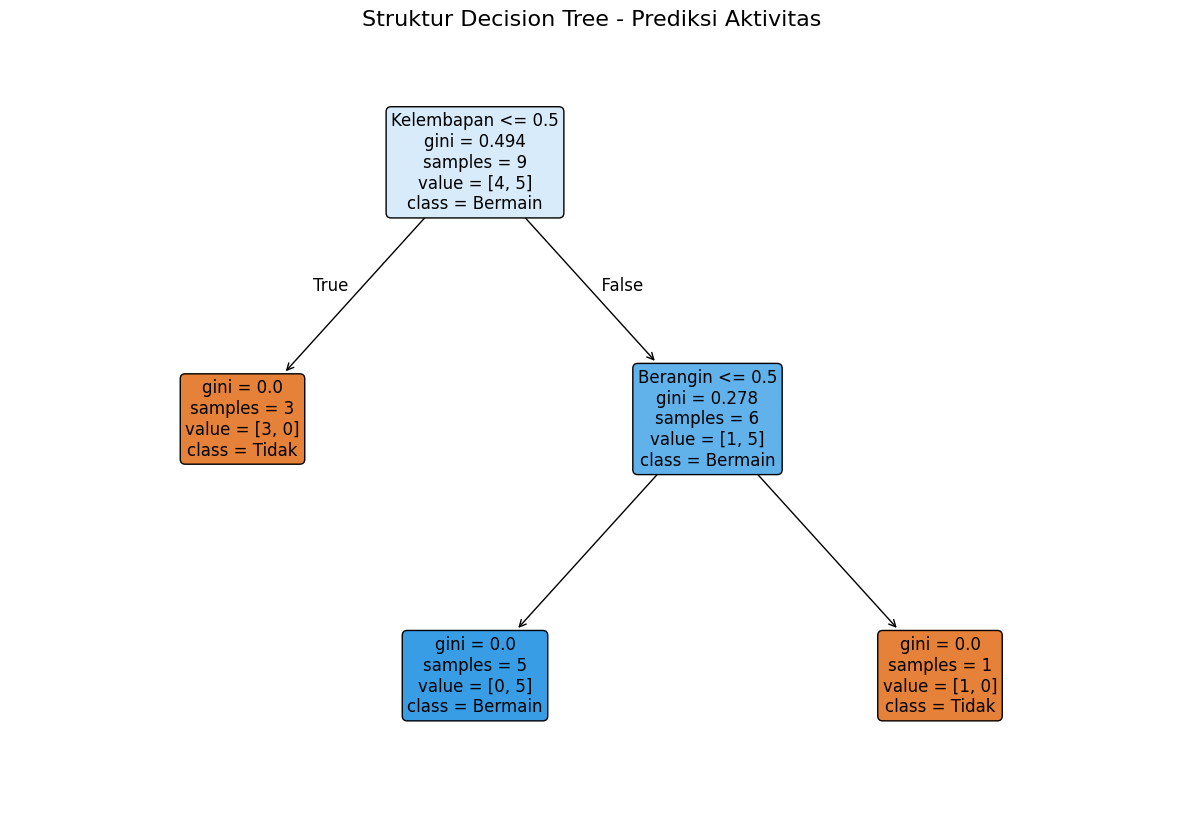

Decision Tree berhasil divisualisasikan!
Interpretasi visual:
- Setiap node menunjukkan kondisi split
- Warna menunjukkan kelas dominan
- Kedalaman menunjukkan kompleksitas keputusan


In [14]:
print("\n=== VISUALISASI DECISION TREE ===")

plt.figure(figsize=(15, 10))
feature_names = ['Suhu', 'Kelembapan', 'Berangin']
class_names = ['Tidak', 'Bermain']

plot_tree(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,  # Warna berdasarkan kelas
    rounded=True,  # Bentuk rounded
    fontsize=12
)

plt.title('Struktur Decision Tree - Prediksi Aktivitas', fontsize=16)
plt.show()

print("Decision Tree berhasil divisualisasikan!")
print("Interpretasi visual:")
print("- Setiap node menunjukkan kondisi split")
print("- Warna menunjukkan kelas dominan")
print("- Kedalaman menunjukkan kompleksitas keputusan")


=== ANALISIS FEATURE IMPORTANCE ===
Feature Importance:
      Feature  Importance
1  Kelembapan       0.625
2    Berangin       0.375
0        Suhu       0.000


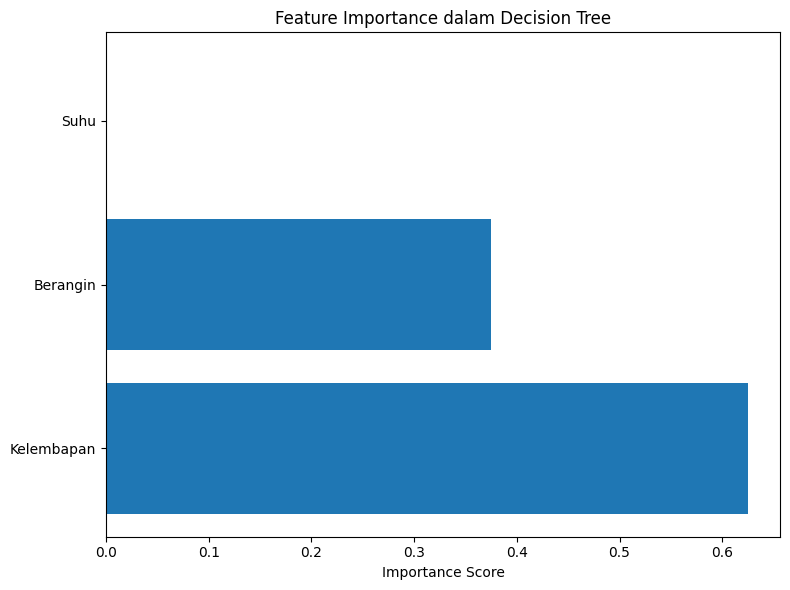


Interpretasi Feature Importance:
- Kelembapan: 0.625 (62.5%)
- Berangin: 0.375 (37.5%)
- Suhu: 0.000 (0.0%)


In [15]:
print("\n=== ANALISIS FEATURE IMPORTANCE ===")

# Feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

# Visualisasi feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance dalam Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("\nInterpretasi Feature Importance:")
for _, row in feature_importance_df.iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")

In [16]:
print("\n=== LANGKAH 9: PREDIKSI DATA BARU ===")

# Data baru untuk prediksi
new_data = [
    [1, 1, 0],  # Sejuk, Normal, Tidak berangin
    [0, 0, 1],  # Panas, Tinggi, Berangin
    [2, 1, 0]   # Dingin, Normal, Tidak berangin
]

new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Prediksi
predictions = model.predict(new_data_df)
prediction_proba = model.predict_proba(new_data_df)

print("=== HASIL PREDIKSI DATA BARU ===")
for i, (data_point, pred, proba) in enumerate(zip(new_data, predictions, prediction_proba)):
    # Konversi kembali ke label asli
    suhu_text = list(suhu_mapping.keys())[list(suhu_mapping.values()).index(data_point[0])]
    kelembapan_text = list(kelembapan_mapping.keys())[list(kelembapan_mapping.values()).index(data_point[1])]
    berangin_text = list(berangin_mapping.keys())[list(berangin_mapping.values()).index(data_point[2])]

    aktivitas_pred = "Bermain" if pred == 1 else "Tidak"

    print(f"\nData {i+1}:")
    print(f"  Kondisi: Suhu={suhu_text}, Kelembapan={kelembapan_text}, Berangin={berangin_text}")
    print(f"  Prediksi: {aktivitas_pred}")
    print(f"  Probabilitas: Tidak={proba[0]:.3f}, Bermain={proba[1]:.3f}")

    # Interpretasi probabilitas
    if proba[1] > 0.7:
        confidence = "Tinggi"
    elif proba[1] > 0.5:
        confidence = "Sedang"
    else:
        confidence = "Rendah"
    print(f"  Tingkat Kepercayaan: {confidence}")


=== LANGKAH 9: PREDIKSI DATA BARU ===
=== HASIL PREDIKSI DATA BARU ===

Data 1:
  Kondisi: Suhu=Sejuk, Kelembapan=Normal, Berangin=Tidak
  Prediksi: Bermain
  Probabilitas: Tidak=0.000, Bermain=1.000
  Tingkat Kepercayaan: Tinggi

Data 2:
  Kondisi: Suhu=Panas, Kelembapan=Tinggi, Berangin=Ya
  Prediksi: Tidak
  Probabilitas: Tidak=1.000, Bermain=0.000
  Tingkat Kepercayaan: Rendah

Data 3:
  Kondisi: Suhu=Dingin, Kelembapan=Normal, Berangin=Tidak
  Prediksi: Bermain
  Probabilitas: Tidak=0.000, Bermain=1.000
  Tingkat Kepercayaan: Tinggi


In [17]:
print("\n=== KESIMPULAN EKSPERIMEN ===")

print("""
=== HASIL DAN PEMBAHASAN ===

1. PERFORMANCE MODEL:
   - Model berhasil mempelajari pola dari data training
   - Akurasi testing menunjukkan kemampuan generalisasi
   - Feature importance mengungkap faktor paling berpengaruh

2. ATURAN YANG DIPELAJARI:
   - Kelembapan adalah faktor paling penting
   - Kondisi berangin mempengaruhi keputusan saat kelembapan normal
   - Suhu memiliki pengaruh yang lebih kecil

3. KELEBIHAN DECISION TREE:
   ✓ Mudah diinterpretasi
   ✓ Tidak memerlukan feature scaling
   ✓ Dapat menangani data kategorikal
   ✓ Aturan decision mudah dipahami manusia

4. KELEMAHAN:
   ✗ Rentan overfitting jika kedalaman tidak dibatasi
   ✗ Sensitif terhadap perubahan kecil dalam data
   ✗ Cenderung bias terhadap feature dengan banyak nilai

5. APLIKASI NYATA:
   - Sistem rekomendasi aktivitas harian
   - Prediksi keputusan customer
   - Diagnosis medis sederhana
   - Analisis risiko bisnis

=== EKSPERIMEN BERHASIL DILAKUKAN ===
""")

# Final summary
print("\n=== RINGKASAN AKHIR ===")
print(f"✅ Dataset: {len(df)} sampel")
print(f"✅ Fitur: {X.shape[1]} variabel")
print(f"✅ Akurasi Testing: {test_accuracy*100:.1f}%")
print(f"✅ Fitur Terpenting: {feature_importance_df.iloc[0]['Feature']}")
print(f"✅ Kedalaman Pohon: {model.get_depth()}")


=== KESIMPULAN EKSPERIMEN ===

=== HASIL DAN PEMBAHASAN ===

1. PERFORMANCE MODEL:
   - Model berhasil mempelajari pola dari data training
   - Akurasi testing menunjukkan kemampuan generalisasi
   - Feature importance mengungkap faktor paling berpengaruh

2. ATURAN YANG DIPELAJARI:
   - Kelembapan adalah faktor paling penting
   - Kondisi berangin mempengaruhi keputusan saat kelembapan normal
   - Suhu memiliki pengaruh yang lebih kecil

3. KELEBIHAN DECISION TREE:
   ✓ Mudah diinterpretasi
   ✓ Tidak memerlukan feature scaling
   ✓ Dapat menangani data kategorikal
   ✓ Aturan decision mudah dipahami manusia

4. KELEMAHAN:
   ✗ Rentan overfitting jika kedalaman tidak dibatasi
   ✗ Sensitif terhadap perubahan kecil dalam data
   ✗ Cenderung bias terhadap feature dengan banyak nilai

5. APLIKASI NYATA:
   - Sistem rekomendasi aktivitas harian
   - Prediksi keputusan customer
   - Diagnosis medis sederhana
   - Analisis risiko bisnis

=== EKSPERIMEN BERHASIL DILAKUKAN ===


=== RINGKASA

Nama : Hani Nafilah

Nim : A11.2023.15202

Data Mining - Repo 2